<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/Qiskit_Tutorial_AdvancedCircuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install qiskit[visualization]
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Advanced Circuits**

In [2]:
import numpy as np
from qiskit import *

In [5]:
from qiskit.circuit import Gate
my_gate = Gate(name='my_gate', num_qubits=2, params=[])

Opaque gates:

In [8]:
qr = QuantumRegister(size=3, name = 'q')
circ = QuantumCircuit(qr)
circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[1], qr[2]])

circ.draw()

┌──────────┐            
q_0: ┤0         ├────────────
     │  my_gate │┌──────────┐
q_1: ┤1         ├┤0         ├
     └──────────┘│  my_gate │
q_2: ────────────┤1         ├
                 └──────────┘

Composite Gates:

In [12]:
# Build a sub-circuit
sub_q = QuantumRegister(size=2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(qubit=sub_q[0])
sub_circ.crz(theta=1, control_qubit=sub_q[0], target_qubit=sub_q[1])
sub_circ.barrier()
sub_circ.id(qubit=sub_q[1])
sub_circ.u(theta=1, phi=2, lam=-2, qubit=sub_q[0])

In [13]:
# Convert to a gate and stick it into an arbitarary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(size=3, name='q')
circ = QuantumCircuit(qr)
circ.h(qubit=qr[0])
circ.cx(control_qubit=qr[0], target_qubit=qr[1])
circ.cx(control_qubit=qr[1], target_qubit=qr[2])
circ.append(instruction=sub_inst, qargs=[qr[1], qr[2]])

circ.draw()

┌───┐                       
q_0: ┤ H ├──■────────────────────
     └───┘┌─┴─┐     ┌───────────┐
q_1: ─────┤ X ├──■──┤0          ├
          └───┘┌─┴─┐│  sub_circ │
q_2: ──────────┤ X ├┤1          ├
               └───┘└───────────┘

In [14]:
decomposed_circ = circ.decompose() # Does not modify original circuit
decomposed_circ.draw()

┌─────────┐                                        
q_0: ┤ U2(0,π) ├──■─────────────────────────────────────
     └─────────┘┌─┴─┐     ┌───┐          ░ ┌───────────┐
q_1: ───────────┤ X ├──■──┤ H ├────■─────░─┤ U(1,2,-2) ├
                └───┘┌─┴─┐└───┘┌───┴───┐ ░ └───┬───┬───┘
q_2: ────────────────┤ X ├─────┤ Rz(1) ├─░─────┤ I ├────
                     └───┘     └───────┘ ░     └───┘

Parameterized circuits:

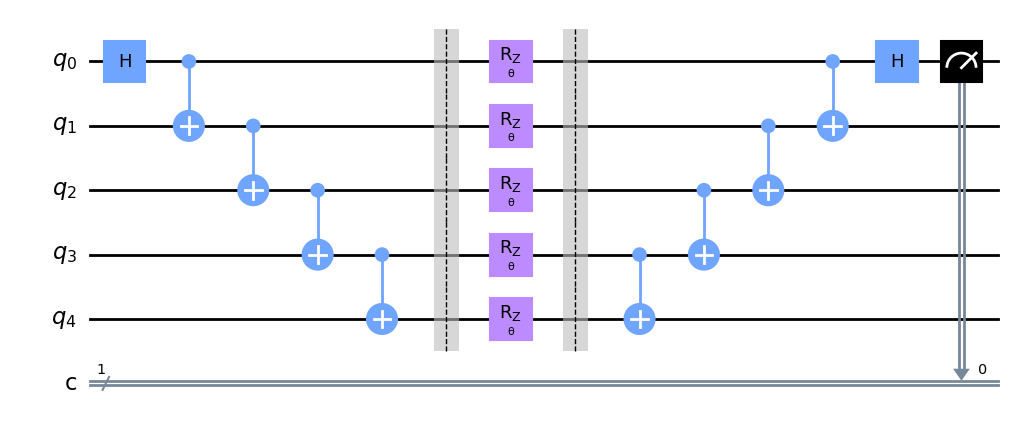

In [26]:
from qiskit.circuit import Parameter

theta = Parameter(name='θ')

n = 5

qc = QuantumCircuit(5, 1) #A QuantumCircuit with 5 qubits and 1 classical bits

qc.h(qubit=0)

for i in range(n-1):
  qc.cx(control_qubit=i, target_qubit=i+1)
###for

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
  qc.cx(control_qubit=i, target_qubit=i+1)
###for

qc.h(qubit=0)
qc.measure(0, 0)

qc.draw(output='mpl')


In [27]:
print(qc.parameters)

ParameterView([Parameter(θ)])


Binding parameters to values:

In [29]:
import numpy as np

theta_range = np.linspace(0, 2 * np.pi, 128)

circuits = [qc.bind_parameters({theta: theta_val}) for theta_val in theta_range]

circuits[-1].draw()

┌───┐                     ░ ┌────────┐ ░                     ┌───┐┌─┐
q_0: ┤ H ├──■──────────────────░─┤ Rz(2π) ├─░──────────────────■──┤ H ├┤M├
     └───┘┌─┴─┐                ░ ├────────┤ ░                ┌─┴─┐└───┘└╥┘
q_1: ─────┤ X ├──■─────────────░─┤ Rz(2π) ├─░─────────────■──┤ X ├──────╫─
          └───┘┌─┴─┐           ░ ├────────┤ ░           ┌─┴─┐└───┘      ║ 
q_2: ──────────┤ X ├──■────────░─┤ Rz(2π) ├─░────────■──┤ X ├───────────╫─
               └───┘┌─┴─┐      ░ ├────────┤ ░      ┌─┴─┐└───┘           ║ 
q_3: ───────────────┤ X ├──■───░─┤ Rz(2π) ├─░───■──┤ X ├────────────────╫─
                    └───┘┌─┴─┐ ░ ├────────┤ ░ ┌─┴─┐└───┘                ║ 
q_4: ────────────────────┤ X ├─░─┤ Rz(2π) ├─░─┤ X ├─────────────────────╫─
                         └───┘ ░ └────────┘ ░ └───┘                     ║ 
c: 1/═══════════════════════════════════════════════════════════════════╩═
                                                                        0

In [31]:
backend = BasicAer.get_backend(name='qasm_simulator')
job = backend.run(transpile(circuits=circuits, backend=backend))
counts = job.result().get_counts()

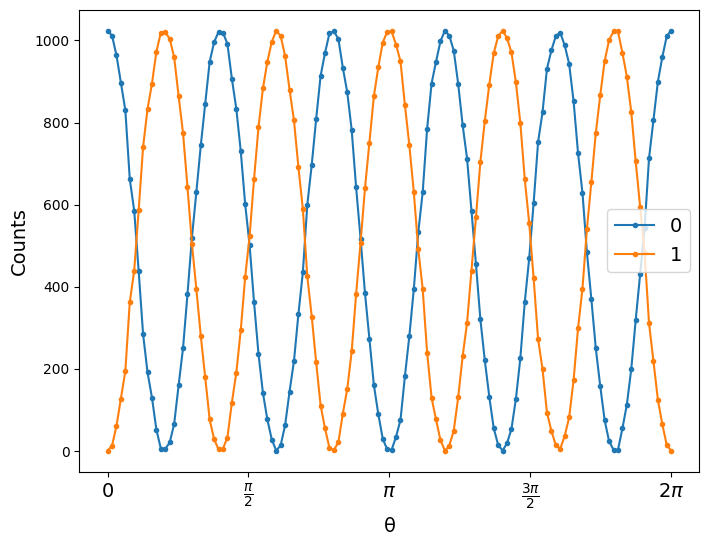

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)

Reducing compilation cost:

In [41]:
import time
from itertools import combinations
from qiskit.compiler import assemble
from qiskit.test.mock import FakeVigo

start = time.time()

qcs = []

theta_range = np.linspace(0, 2*np.pi, 32)

for n in theta_range:
  qc = QuantumCircuit(5)

  for k in range(8):
    for i, j in combinations(range(5), 2):
      qc.cx(i, j)
    ###for
    qc.rz(n, range(5))
    for i, j in combinations(range(5), 2):
      qc.cx(i, j)
    ###for
  ###for
  qcs.append(qc)
###
compiled_circuits = transpile(qcs, backend=FakeVigo())
qobj = assemble(compiled_circuits, backend=FakeVigo())

end = time.time()
print('Time compiling over set of bound circuits: ', end-start)

<ipython-input-41-380c134d4594>:4: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeVigo


Time compiling over set of bound circuits:  4.634971618652344


In [48]:
start = time.time()
qc = QuantumCircuit(5)
theta = Parameter('theta')

for k in range(8):
    for i,j in combinations(range(5), 2):
        qc.cx(i,j)
    ###for
    qc.rz(theta, range(5))
    for i,j in combinations(range(5), 2):
        qc.cx(i,j)
    ###for
###for

transpiled_qc = transpile(qc, backend=FakeVigo())
qobj = assemble([transpiled_qc.bind_parameters({theta: n}) for n in theta_range], backend=FakeVigo())
end = time.time()
print('Time compiling over parameterized circuit, then binding: ', end-start)

Time compiling over parameterized circuit, then binding:  0.5477614402770996


Composition:

In [55]:
phi = Parameter('phi')

sub_circ1 = QuantumCircuit(2, name='sc_1')
sub_circ1.rz(phi, 0)
sub_circ1.rx(phi, 1)

sub_circ2 = QuantumCircuit(2, name='sc_2')
sub_circ2.rx(phi, 0)
sub_circ2.rz(phi, 1)

qc = QuantumCircuit(4)
qr = qc.qregs[0]

qc.append(sub_circ1.to_instruction(), [qr[0], qr[1]])
qc.append(sub_circ2.to_instruction(), [qr[0], qr[1]])

qc.append(sub_circ2.to_instruction(), [qr[2], qr[3]])
qc.draw()

┌────────────┐┌────────────┐
q_0: ┤0           ├┤0           ├
     │  sc_1(phi) ││  sc_2(phi) │
q_1: ┤1           ├┤1           ├
     ├────────────┤└────────────┘
q_2: ┤0           ├──────────────
     │  sc_2(phi) │              
q_3: ┤1           ├──────────────
     └────────────┘

In [61]:
p = Parameter('p')
qc = QuantumCircuit(3, name='oracle')
qc.rz(p, 0)
qc.cx(0, 1)
qc.rz(p, 1)
qc.cx(1, 2)
qc.rz(p, 2)

theta = Parameter('theta')
phi = Parameter('phi')
gamma = Parameter('gamma')

qr = QuantumRegister(9)
larger_qc = QuantumCircuit(qr)
larger_qc.append(qc.to_instruction({p: theta}), qr[0:3])
larger_qc.append(qc.to_instruction({p: phi}), qr[3:6])
larger_qc.append(qc.to_instruction({p: gamma}), qr[6:9])
larger_qc.draw()

┌────────────────┐
q1393_0: ┤0               ├
         │                │
q1393_1: ┤1 oracle(theta) ├
         │                │
q1393_2: ┤2               ├
         └┬──────────────┬┘
q1393_3: ─┤0             ├─
          │              │ 
q1393_4: ─┤1 oracle(phi) ├─
          │              │ 
q1393_5: ─┤2             ├─
         ┌┴──────────────┴┐
q1393_6: ┤0               ├
         │                │
q1393_7: ┤1 oracle(gamma) ├
         │                │
q1393_8: ┤2               ├
         └────────────────┘

In [62]:
larger_qc.decompose().draw()

┌───────────┐                                    
q1393_0: ┤ Rz(theta) ├──■─────────────────────────────────
         └───────────┘┌─┴─┐┌───────────┐                  
q1393_1: ─────────────┤ X ├┤ Rz(theta) ├──■───────────────
                      └───┘└───────────┘┌─┴─┐┌───────────┐
q1393_2: ───────────────────────────────┤ X ├┤ Rz(theta) ├
          ┌─────────┐                   └───┘└───────────┘
q1393_3: ─┤ Rz(phi) ├───■─────────────────────────────────
          └─────────┘ ┌─┴─┐ ┌─────────┐                   
q1393_4: ─────────────┤ X ├─┤ Rz(phi) ├───■───────────────
                      └───┘ └─────────┘ ┌─┴─┐ ┌─────────┐ 
q1393_5: ───────────────────────────────┤ X ├─┤ Rz(phi) ├─
         ┌───────────┐                  └───┘ └─────────┘ 
q1393_6: ┤ Rz(gamma) ├──■─────────────────────────────────
         └───────────┘┌─┴─┐┌───────────┐                  
q1393_7: ─────────────┤ X ├┤ Rz(gamma) ├──■───────────────
                      └───┘└───────────┘┌─┴─┐┌───────────┐
q1393_8: ───────────────────────────────┤ X ├┤ Rz(gamma) ├
                                        └───┘└───────────┘